# Pandas チートシート

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## 基本設定

##  pd.set_option('display.max_rows',100)
表示する最大行数を指定

## pd.set_option('display.max_columns',50)
表示する最大列数を指定 Noneですべての列を表示することができる

## データセット準備

## Breast Cancer wisons
2クラス30特徴量

In [2]:
import urllib
try:
    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases'
                     '/breast-cancer-wisconsin/wdbc.data', header=None)
except urllib.error.URLError:
    df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book/master/code/'
                     'datasets/wdbc/wdbc.data', header=None)
print('rows, columns:', df.shape)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X=df.iloc[:,2:]
y=df.iloc[:,1]
y=le.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
df.head()

rows, columns: (569, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Boston Housingデータ
回帰モデル、13特徴量

In [2]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'housing/housing.data',
                 header=None,
                 sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
display(df.head())

X=df.iloc[:,:df.shape[1]-1]
y=df['MEDV']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## pd.DataFrame({'col1':[1,2,3],'col2':[4,5,6]})
DataFrameを自分で作るときに便利

In [23]:
pd.DataFrame({'col1':[1,2,3],'col2':[4,5,6]})

,col1,col2
0,1,4
1,2,5
2,3,6


## df.values()
DataFrameの値をnumpy配列で取得。sklearnにDataFrameを入れると、numpy配列に変換されるらしい

In [3]:
df.values

array([[842302, 'M', 17.99, ..., 0.2654, 0.4601, 0.1189],
       [842517, 'M', 20.57, ..., 0.18600000000000003, 0.275, 0.08902],
       [84300903, 'M', 19.69, ..., 0.243, 0.3613, 0.08757999999999999],
       ...,
       [926954, 'M', 16.6, ..., 0.1418, 0.2218, 0.0782],
       [927241, 'M', 20.6, ..., 0.265, 0.4087, 0.124],
       [92751, 'B', 7.76, ..., 0.0, 0.2871, 0.07039]], dtype=object)

## df.describe()
お手軽に各列の平均や最大などの基本情報をまとめてくれる。数値データのみ表示するので、文字列データの特徴量には何の操作もしてくれない

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## df.info()
各列の特徴量の数と、欠損情報、型の情報を返してくれる。数値データと文字列データを把握したいときに役に立つ

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


## df.dtypes
各列の値のデータ型を出力

In [7]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

## df.set_index('col')
DFのindexを指定したカラムの値に変える

In [19]:
df.set_index(1).head()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
1,,,,,,,,,,,,,,,,,,,,,
M,842302.0,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,NaN,0.7119,0.2654,0.4601,0.11890
M,842517.0,20.57,17.77,132.90,1326.0,0.08474,NaN,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
M,84300903.0,19.69,21.25,130.00,NaN,0.10960,0.1599,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,NaN,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
M,84348301.0,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,NaN,0.8663,0.6869,0.2575,0.6638,0.17300
M,NaN,20.29,14.34,135.10,NaN,0.10030,0.1328,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 各データ型をカウント

In [4]:
dtyes_df=df.dtypes.reset_index()
dtyes_df.columns=['count','columns type']
dtyes_df.groupby('columns type').aggregate('count').reset_index()

,columns type,count
0,int64,1
1,float64,30
2,object,1


## 各要素の数を数えあげ
## df.groupby('col1')['col1'].count()
分類問題での、各ラベルの分布を確認するのに役立つ。

In [4]:
df.groupby(1)[1].count()

1
B    357
M    212
Name: 1, dtype: int64

## 指定した要素を持つ行数を列ごとに数え上げ
## (df== 'T').sum().plot(kind='hist')

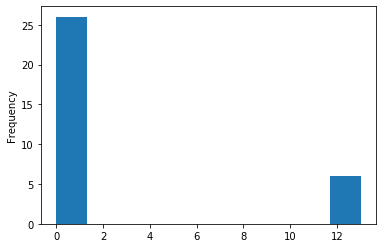

In [6]:
(df==0).sum().plot(kind='hist')

## df.nlargest(10, 'col')
DFの中から指定したカラムに対する値から、上位10個の値を取得すう。  
目的変数に適応したヒートマップを作成するときに便利

In [14]:
corr=df.corr()
corr.nlargest(5,'MEDV')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.000000
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
B,-0.385064,0.175520,-0.356977,0.048788,-0.380051,0.128069,-0.273534,0.291512,-0.444413,-0.441808,-0.177383,1.000000,-0.366087,0.333461
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929


## df.select_dtypes(include=int)
特定のデータ型のみを抽出する。exclude=objectで数値型のみを取得することができる。

In [5]:
df.select_dtypes(include=object).head()

,1
0,M
1,M
2,M
3,M
4,M


## pd.columns
列のカラム名を表示。DFを作成した後に、カラム名を変更するときに使える。

In [3]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## pd.concat([df1,df2] , axis=1, keys=['col1','col2'])
2以上のデータフレームをつなげる。axis=1を指定すると、横に結合する

In [7]:
df1=pd.DataFrame({'col1':[1,2],"col2":[2,3]})
df2=pd.DataFrame({'col1':[5,1],"col2":[6,3]})
df=pd.concat([df1,df2])
df

,col1,col2
0,1,2
1,2,3
0,5,6
1,1,3


## df1.join(df2, how='right')
indexをキーとして結合する場合に便利。結合の仕方はhow指定することができる。

In [5]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                    index=['K0', 'K1', 'K2'])

right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])
left.join(right,how='right')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


## pd.merge(df_left, df_right, how='inner', on='key')
２つのDFを、共通部分で結合

## df.rename(columns={'A': 'a'}, index={'ONE': 'one'}
カラム名を新しい変更

## train[['x_0','y_0','z_0']]
 複数の列を表示するときはカラム名をリストにいれる

## train[['x_0','y_0','z_0']].values
DataFrameの列の値をNumpy配列で返す

In [21]:
print(df['MEDV'].values[:5])
print(type(df['MEDV'].values))

[24.  21.6 34.7 33.4 36.2]
<class 'numpy.ndarray'>


## df.query('col>0')
df[df['col']>0]と同じ意味。文字列で条件をかけるので直感的。

In [ ]:
df.query('AGE<20').AGE.max()

## df.replace(0,5)
DF中の指定した値を、指定した値に置き換える操作。応用の汎用性が高いので覚えておくと便利  
辞書型で変換の対応を指定することができる

In [4]:
df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                    'B': [5, 6, 7, 8, 9],
                    'C': ['a', 'b', 'c', 'd', 'e']})
df.replace({'A':0,'B':5},100)

,A,B,C
0,100,100,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


###  欠損値の表記をNaNnに変更
## df.replace('None',np.nan)
欠損値を行う前にNaNの形に変更を行う。

## サンプリング
## df.sample(frac=0.5,replace=True)
## df.sample(n=100)
簡単にランダムサンプリングできる、sampleメソッド。replace=Trueで重複を許可.nで行数を指定

In [7]:
print(len(df.sample(frac=0.5)))
print(len(df))
df.sample(frac=0.5)[:3]

284
569


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
411,905520,B,11.040,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.024800,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
403,9047,B,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.023900,...,13.86,23.02,89.69,580.9,0.1172,0.1958,0.18100,0.08388,0.3297,0.07834
467,9113514,B,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,...,11.15,24.62,71.11,380.2,0.1388,0.1255,0.06409,0.02500,0.3057,0.07875


## グルーピング

## df.groupby(['A', 'B'],as_index=False).sum()
df.groupbメソッドで、指定したカラム名でグループに分けたオブジェクトを返す。as_index=Falseで、カラム名がインデックスになるのを避ける。   
オブジェクトを返すので、sum,meanなどを実行しないと、値として得られない  

groupbyした後は、指定された列がインデックスに変わってしまうので、reset_index()メソッドを入れるくせをつける。as_index=Falseでその手間を省くことができる

In [28]:
df = pd.DataFrame({
    'city': ['osaka', 'osaka', 'osaka', 'tokyo', 'tokyo', ],
    'food': ['apple','banana', 'banana', 'apple', 'banana'],
    'price': [100, 200, 250, 300,  200],
    'quantity': [1, 2, 3, 4, 5,]})
display(df.groupby(['city','food']).mean())
# get_groupメソッドで、指定した要素のみを取り出す。
display(df.groupby('city').get_group('osaka'))

price  quantity
city  food                   
osaka apple   100.0       1.0
      banana  225.0       2.5
tokyo apple   300.0       4.0
      banana  200.0       5.0

,city,food,price,quantity
0,osaka,apple,100,1
1,osaka,banana,200,2
2,osaka,banana,250,3


In [26]:
df.groupby(["RAD"]).sum().reset_index()

,RAD,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0.72057,798.0,101.32,1,9.2578,131.117,900.5,120.5565,5829.0,351.3,7785.46,147.40,487.3
1,2,1.99885,490.0,231.14,0,11.6380,159.599,1554.5,98.3282,6256.0,415.0,9273.93,240.59,644.0
2,3,3.69966,622.5,167.92,2,17.1921,245.975,1873.8,195.5667,9351.0,690.4,14911.88,344.89,1061.3
3,4,43.32938,1620.5,1182.13,8,55.4742,674.643,6692.6,487.6300,36958.0,2105.0,42099.34,1341.90,2352.6
4,5,79.09604,1277.5,1122.38,11,65.6516,735.213,7960.7,425.1928,38162.0,1902.9,42457.13,1225.58,2956.3
5,6,3.90140,337.5,213.15,0,13.3860,158.723,1563.7,104.6478,9695.0,463.2,10071.53,319.95,545.4
6,7,2.55679,454.0,85.59,0,7.4970,113.012,682.4,110.4296,5175.0,312.9,6603.36,135.80,460.8
7,8,8.91383,150.0,142.38,5,11.8200,166.819,1616.4,105.8545,7230.0,431.4,9246.66,191.06,728.6
8,24,1684.22640,0.0,2389.20,8,88.7590,794.924,11854.3,272.0855,87912.0,2666.4,38027.77,2455.28,2165.3


## df.groupby(['A'],as_index=False).size()
sizeメソッドで、データ数をカウントできる。countメソッドは、全ての列の値をカウントするが、sizeメソッドはグルーピングした要素の数をカウントする


In [19]:
df.groupby(['RAD']).size()

RAD
1      20
2      24
3      38
4     110
5     115
6      26
7      17
8      24
24    132
dtype: int64

## df.gropuby(['col']).agg({'price': np.mean, 'quantity': np.sum})
## df.gropuby(['col']).agg({'price': 'count', 'quantity': 'nunique'})
agg(aggression)でグループごとに指定した関数を適応できる。groupbyと使うと威力が高いメソッド  
 メソッド名を対応させる。

In [30]:
display(df.groupby('food').agg({'price':np.mean,'quantity':np.sum}))

display(df.groupby('food').agg({'price':'mean','quantity':'sum'}))

,price,quantity
food,,
apple,200.000000,5
banana,216.666667,10


,price,quantity
food,,
apple,200.000000,5
banana,216.666667,10


## df.gropuby(['col'])['col2'].agg(['nunique','sum','mean',lambda x: np.percentile(x, q=20)])
aggメソッドで複数の処理をまとめて行うことができる。自分で関数指定する場合はlambda を使う

In [37]:
df.groupby(['food'])['price'].agg(['mean','max','median',lambda x:np.percentile(x,q=20)]).reset_index()

,food,mean,max,median,<lambda_0>
0,apple,200.000000,300,200,140
1,banana,216.666667,250,200,200


## df.apply(lambda x: (x - x.mean()) / x.std())
各列に対して処理を行う。groupbyとの相性が良い。もちろん単品で使っても便利  
lambda関数を組み合わせて使うことが多いので勉強になる。

In [22]:
df.groupby(['city','food'],as_index=False).apply(lambda x:(x.price*x.quantity).sum())

city   food  
osaka  apple      100
       banana    1150
tokyo  apple     1200
       banana    1000
dtype: int64

## series.rolling(window=2,min_periods=2,center=False).mean()
seriesの各要素について（その要素を含み）それ以前の2(window)つぶん遡って、平均を計算する。有効な計算結果を出すのに最低限必要な要素数を指定するのがmin_prerios    
ceterをTrueにすると、自身のデータ行が真ん中に来るようにできる  
rollingメソッドだけでは、オブジェクトを生成するだけなので、mean,sumメソッドと合わせて使う。

In [23]:
s=pd.Series(range(0,7))
s.rolling(window=2,min_periods=2).mean()

0    NaN
1    0.5
2    1.5
3    2.5
4    3.5
5    4.5
6    5.5
dtype: float64

## pd.crosstab( index=df['col1'], columns=df['col2'], normalize='index')
クロス集計表（2つの特徴に当てはまる要素の数を数え上げたテーブル）手軽に作れる

In [5]:
sex = np.random.choice(['male','female'],size=20)
item = np.random.choice(['dish', 'knife', 'fork'],size=20)
price = np.random.choice([100,1000,5000],size=20)
df = pd.DataFrame({'sex':sex,'item':item,'price':price})
pd.crosstab(index=df['sex'],columns=df['item'],normalize='index')

item,dish,fork,knife
sex,,,
female,0.25,0.250000,0.500000
male,0.50,0.416667,0.083333


## pd.pivot_table(df,index='col1',columns='col2',values='col3',aggfunc=lamba x:len(x),fill_values=0)
データの横持ち変換と、集約処理を同時に行えるとても便利な関数。index,colmunsに集計する二つの列を指定して、valuesにはいる値を指定。aggfuncで入れる値を処理する関数を指定できる。fill_valuesでNaN に入れる値をしてい


In [11]:
pd.pivot_table(df,index='RAD',columns='AGE',values='MEDV',aggfunc=np.mean,fill_value=0)

AGE,2.9,6.0,6.2,6.5,6.6,6.8,7.8,8.4,8.9,9.8,...,98.2,98.3,98.4,98.5,98.7,98.8,98.9,99.1,99.3,100.0
RAD,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,26.6,0.0,0.0,24.7,25.3,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,23.4,0.0,24.2,0.0,22.8,0.0,0.0,23.7,...,15.7,7,16.35,0.0,0.0,15.8,19.2,0.0,0.0,15.850000
5,0.0,24.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.0,0,0.00,19.4,0.0,0.0,0.0,0.0,0.0,20.820000
6,0.0,0.0,0.0,0.0,0.0,0.0,23.7,0.0,0.0,0.0,...,0.0,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7,0.0,0.0,0.0,0.0,0.0,29.6,0.0,42.8,24.8,0.0,...,0.0,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.2,13,0.00,0.0,14.1,13.2,10.0,10.9,17.8,15.724138


## df.stack()
ワイドフォーマットのデータ型をロングフォーマットに変換する

In [13]:
df_wide=pd.read_csv('../study/kagglebook-master/input/ch03/time_series_wide.csv',index_col=0)
display(df[:3])

df_long=df_wide.stack().reset_index(1)
df_long.columns=['id','value']
display(df_long[:5])

,A,B,C
2016-07-01,532,3314,1136
2016-07-02,798,2461,1188
2016-07-03,823,3522,1711


,id,value
2016-07-01,A,532
2016-07-01,B,3314
2016-07-01,C,1136
2016-07-02,A,798
2016-07-02,B,2461


## clipping
## df['col'].clip(p01,p99,axis=1)
数値変数に外れ値が含まれる際に、上限下限を設定し外れた値は上限下限の値で置換える操作。  
分位点を閾値とする方法がわかりやすい

In [14]:
# １％、９９％分位点をとる
p01 = df['MEDV'].quantile(0.01)
p99 = df['MEDV'].quantile(0.99)
df['MEDV_clip']=df['MEDV'].clip(p01,p99)
print(df['MEDV'].min(),df['MEDV_clip'].min())

5.0 7.01


## スパースマトリックスを作る場合
## from scipy.sparse import csc_matrix

In [13]:
from scipy.sparse import csc_matrix
csc_matrix((df['AGE'],(df['RAD'],df['MEDV'])),shape=(len(df['RAD']),len(df['MEDV'])))

<506x506 sparse matrix of type '<class 'numpy.float64'>'
	with 171 stored elements in Compressed Sparse Column format>

## pd.cut( df['col'] , 8)
値を元にして、ビン分割を行う   
## pd.qcut(df['col'],8)
 量を元にしてビン分割を行う。引数の値は分割後に含まれる数を指定できる

In [5]:
df=np.random.randint(0,100,50)
print(pd.cut(df,5))
print(pd.qcut(df,5))

[(39.4, 58.6], (39.4, 58.6], (20.2, 39.4], (39.4, 58.6], (0.904, 20.2], ..., (39.4, 58.6], (0.904, 20.2], (0.904, 20.2], (0.904, 20.2], (77.8, 97.0]]
Length: 50
Categories (5, interval[float64]): [(0.904, 20.2] < (20.2, 39.4] < (39.4, 58.6] < (58.6, 77.8] < (77.8, 97.0]]
[(43.0, 56.2], (56.2, 84.2], (29.0, 43.0], (43.0, 56.2], (0.999, 29.0], ..., (43.0, 56.2], (0.999, 29.0], (0.999, 29.0], (0.999, 29.0], (84.2, 97.0]]
Length: 50
Categories (5, interval[float64]): [(0.999, 29.0] < (29.0, 43.0] < (43.0, 56.2] < (56.2, 84.2] < (84.2, 97.0]]


## df.as_matrix()
DataFrame型をnumpy配列に直す  
DFの特定の列を標準化する場合に便利

In [7]:
df=pd.DataFrame({'col1':[1,2,3],"col2":[4,5,6]})
print(df.as_matrix())
# DFの特定の列を標準化
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df.col1.as_matrix().reshape(-1,1))

[[1 4]
 [2 5]
 [3 6]]


StandardScaler(copy=True, with_mean=True, with_std=True)

## df.to_datetime()
DF中の日付データをdatetime型に変換する

## df.dt.date
Seriesに対して使える、datetime型を指定した形に変換する。dtを挟むので注意。メソッドはたくさんあるので、適宜調べる必要がある。  
https://qiita.com/Takemura-T/items/79b16313e45576bb6492

In [29]:
import datetime
date=pd.read_csv('../study/awesomebook/data/reserve.csv')
pd.to_datetime(date['reserve_datetime'],format='%Y-%m-%d %H:%M:%S')
pd.to_datetime(date['checkin_date']+date['checkin_time'],format='%Y-%m-%d%H:%M:%S')

pd.to_datetime(date['reserve_datetime'],format='%Y-%m-%d %H:%M:%S').dt.date
pd.to_datetime(date['checkin_date'],format='%Y-%m-%d').dt.date

0       2016-03-26
1       2016-07-20
2       2016-10-19
3       2017-03-29
4       2017-09-22
           ...    
4025    2017-07-10
4026    2017-10-09
4027    2018-04-02
4028    2016-05-10
4029    2016-07-06
Name: checkin_date, Length: 4030, dtype: object

## 年、月、日、曜日の取得

In [35]:
date['reserve_datetime']=pd.to_datetime(date['reserve_datetime'],format='%Y-%m-%d %H:%M:%S')

date['year']=date['reserve_datetime'].dt.year

date['month']=date['reserve_datetime'].dt.month

date['day']=date['reserve_datetime'].dt.day

date['week']=date['reserve_datetime'].dt.dayofweek

date['hour']=date['reserve_datetime'].dt.hour

date['minute']=date['reserve_datetime'].dt.minute

date['second']=date['reserve_datetime'].dt.minute

date['reserve_datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

display(date[:3])

,reserve_id,hotel_id,customer_id,reserve_datetime,checkin_date,checkin_time,checkout_date,people_num,total_price,year,month,day,week,hour,minute,second
0,r1,h_75,c_1,2016-03-06 13:09:42,2016-03-26,10:00:00,2016-03-29,4,97200,2016,3,6,6,13,9,9
1,r2,h_219,c_1,2016-07-16 23:39:55,2016-07-20,11:30:00,2016-07-21,2,20600,2016,7,16,5,23,39,39
2,r3,h_179,c_1,2016-09-24 10:03:17,2016-10-19,09:00:00,2016-10-22,2,33600,2016,9,24,5,10,3,3


## 日時差の計算

In [38]:
date=pd.read_csv('../study/awesomebook/data/reserve.csv')
# 時刻列の形式を指定
date['reserve_datetime']=pd.to_datetime(date['reserve_datetime'],format='%Y-%m-%d %H:%M:%S')

date['checkin_datetime']=pd.to_datetime(date['checkin_date']+date['checkin_time'],format='%Y-%m-%d%H:%M:%S')

date['year_diff']=date['reserve_datetime'].dt.year-date['checkin_datetime'].dt.year

date['month_diff']=(date['reserve_datetime'].dt.year*12+date['reserve_datetime'].dt.month)\
                                    -(date['checkin_datetime'].dt.year*12+date['checkin_datetime'].dt.year)
                                      
date['day_diff']=(date['reserve_datetime']-date['checkin_datetime']).astype('timedelta64[D]')

date['hour_diff']=(date['reserve_datetime']-date['checkin_datetime']).astype('timedelta64[h]')

date['minute_diff']=(date['reserve_datetime']-date['checkin_datetime']).astype('timedelta64[m]')

date['second_diff']=(date['reserve_datetime']-date['checkin_datetime']).astype('timedelta64[s]')

display(date[:3])

,reserve_id,hotel_id,customer_id,reserve_datetime,checkin_date,checkin_time,checkout_date,people_num,total_price,checkin_datetime,year_diff,month_diff,day_diff,hour_diff,minute_diff,second_diff
0,r1,h_75,c_1,2016-03-06 13:09:42,2016-03-26,10:00:00,2016-03-29,4,97200,2016-03-26 10:00:00,0,-2013,-20.0,-477.0,-28611.0,-1716618.0
1,r2,h_219,c_1,2016-07-16 23:39:55,2016-07-20,11:30:00,2016-07-21,2,20600,2016-07-20 11:30:00,0,-2009,-4.0,-84.0,-5031.0,-301805.0
2,r3,h_179,c_1,2016-09-24 10:03:17,2016-10-19,09:00:00,2016-10-22,2,33600,2016-10-19 09:00:00,0,-2007,-25.0,-599.0,-35937.0,-2156203.0


## 日時の加算
datetimeモジュールのtimedeltaを用いる。

In [41]:
import datetime

date=pd.read_csv('../study/awesomebook/data/reserve.csv')

date['reserve_datetime']=pd.to_datetime(date['reserve_datetime'],format='%Y-%m-%d %H:%M:%S')

date['reserve_date']=date['reserve_datetime']+datetime.timedelta(days=1)

## 季節への変換
大きなまとまりでくくることで失われる情報があるので、むやみに分ければいいというわけではなさそう

In [45]:
def to_season(month_num):
    season='winter'
    if 3<=month_num<=5:
        season='spring'
    elif 6<=month_num<=8:
        season='summer'
    elif 9<=month_num<11:
        season='autumn'
    return season

date['season']=pd.Categorical(date['reserve_date'].dt.month.apply(to_season),categories=['spring','summer','autumn','winter'])

display(date[:3])

,reserve_id,hotel_id,customer_id,reserve_datetime,checkin_date,checkin_time,checkout_date,people_num,total_price,reserve_date,season
0,r1,h_75,c_1,2016-03-06 13:09:42,2016-03-26,10:00:00,2016-03-29,4,97200,2016-03-07 13:09:42,spring
1,r2,h_219,c_1,2016-07-16 23:39:55,2016-07-20,11:30:00,2016-07-21,2,20600,2016-07-17 23:39:55,summer
2,r3,h_179,c_1,2016-09-24 10:03:17,2016-10-19,09:00:00,2016-10-22,2,33600,2016-09-25 10:03:17,autumn


## 特徴量の要素数をカウント
## df.groupby('col1').count()
uniqueな特徴量がそれぞれどれ程あるのかを確認することができる

In [7]:
df.groupby(1).count()[0]

1
B    357
M    212
Name: 0, dtype: int64

## df['col'].str
strアクセサ。内部のデータ型が’文字列’の時に、strアクセサを使って、各要素に対して文字列メソッドを適用できる。おまじないみたいなもの？  
文字列メソッドとは、pythonのobject型に通常行う操作のこと

In [7]:
str_df=pd.DataFrame({'col1':['AAA', 'BBB', 'CCC'],'col2':[1,2,3]})
str_df['col1'].str.lower()

0    aaa
1    bbb
2    ccc
Name: col1, dtype: object

## df['col'].unique()
uniqueな要素の配列を取得

In [21]:
df['RAD'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

## df['col'].nunique()
uniqueな要素数を取得

In [24]:
df['RAD'].nunique()

9

## df['col'].value_counts(normalize=True)
ユニークな要素の出現回数をまとめる。

In [23]:
df['RAD'].value_counts(normalize=True)

24    0.260870
5     0.227273
4     0.217391
3     0.075099
6     0.051383
8     0.047431
2     0.047431
1     0.039526
7     0.033597
Name: RAD, dtype: float64

## df['col'].round(-2)
roundメソッドで、丸め込みが可能。-1 が10の位、-2が１００の位を丸め込む

In [44]:
df['TAX'].round(-1).astype(int)

0      300
1      240
2      240
3      220
4      220
      ... 
501    270
502    270
503    270
504    270
505    270
Name: TAX, Length: 506, dtype: int64

## df['col'].mode()
最頻値を簡単に取得してくれるありがたいメソッド

In [46]:
df['RAD'].mode()

0    24
dtype: int64

## df.rank(ascending=False,method='first')
ランク付けを行う。methodで、重複した値をどう処理するかを指定。firstで、先に出た値を優先する。  
groupbyと組み合わせることで、基準となる列を指定できる。

In [19]:
df.groupby('RAD')["AGE"].rank(ascending=False,method='first')


0       6.0
1       8.0
2      16.0
3      24.0
4      17.0
       ... 
501     5.0
502     4.0
503     1.0
504     2.0
505     3.0
Name: AGE, Length: 506, dtype: float64

## df['col'].shift(periods=3)
## df['col'].shift(freq='D')
DFを指定した分だけずらすことができる。末端の部分はNaNが入る。時系列データの場合は、ずらす時間幅を指定できる

In [5]:
df['AGE'].shift(periods=3)

0       NaN
1       NaN
2       NaN
3      65.2
4      78.9
       ... 
501    65.3
502    73.5
503    79.7
504    69.1
505    76.7
Name: AGE, Length: 506, dtype: float64

## df.index.difference(df2.index)
引数の値との差集合をとるメソッド。　

In [13]:
df.columns.difference(df.select_dtypes(include='int64'))

Index(['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'MEDV', 'NOX',
       'PTRATIO', 'RAD', 'RM', 'TAX', 'ZN'],
      dtype='object')

## df.loc[[1:3], ['Age', 'Height']]
1:3行,Age,Height列にアクセス locは名前による参照

## df.iloc[[1:3], [0,2]]
1:3行　0,2列にアクセス　ilocは番号による参照



## df.loc[df["columns"]>=5]
DFはbool型のシーケンスを指定してTrueのみを取り出すフィルタリングができる  
df.loc[df['カラム']を含む条件式]  
二つの条件　df.loc[df["banana"]>=5][df['apple']<=3] も可能

## df.iloc[0:100,[0,2]]
 ilocは行番号と列番号で位置を指定できる
 0~100行、1,3列を取得

## df['col'].isin([X])
DFの列内にXが含まれれているかをbool型で返してくれる。  ]
df['col'].isin([X]).any()でその列全体で存在するかをbool型で返してくれる

In [6]:
# BostonHousing
df['MEDV'].isin([24.0]).any()

True

## df.isnull()
欠損値NaNである要素はTrue,正常に値が入っている場合はFalseとなったDataFrameを返す

## df.isnull().any()
各特徴量ごとに、欠損値が一つでも含まれる場合は、True,欠損値が一つもない場合はFalseを表示。

## 欠損値の多い順に並び替え

In [7]:
for i in range(df.shape[1]):
    num=np.random.randint(0,100,1)
    null=np.random.randint(0,df.shape[0],num)
    df.iloc[null,i]=None
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count',ascending=False)
missing_df.head()

,column_name,missing_count
4,4,92
25,25,88
19,19,88
0,0,82
12,12,82


## df.notnull()
isnullの逆で、欠損値ではない要素を返す

## df.drop(['col1','col2','col3'],axis=1)
column名の列をすべて削除する。正解ラベルを別の変数に入れてから、列から削除したいときに便利  

In [14]:
df_=df
display(df_.head(3))
df_=df_.drop(['CRIM','INDUS','NOX'],axis=1)
display(df_.head(3))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


,ZN,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,18.0,0,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.0,0,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.0,0,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


## df.dropna()
欠損値を持つ行を削除。df.dropna(axis=1)で列を削除  
how='all'ですべての列がNaNである行だけ削除。　thresh=4で非NaN値が4つ未満の行を削除　subset=['C']特定の列(C列)にNaNが含まれている行を削除

In [9]:
from io import StringIO
csv_data = '''A,B,C,D,E
1.0,2.0,3.0,4.0,
5.0,6.0,,8.0,
10.0,11.0,12.0,,
2.0,,2.0,,
,3.2,,,'''
df=pd.read_csv(StringIO(csv_data))
df

,A,B,C,D,E
0,1.0,2.0,3.0,4.0,NaN
1,5.0,6.0,NaN,8.0,NaN
2,10.0,11.0,12.0,NaN,NaN
3,2.0,NaN,2.0,NaN,NaN
4,NaN,3.2,NaN,NaN,NaN


In [7]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [10]:
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [11]:
df.dropna(how="all",axis=1)

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN
3,2.0,NaN,2.0,NaN
4,NaN,3.2,NaN,NaN


In [12]:
df.dropna(thresh=4,axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0
3,2.0,NaN
4,NaN,3.2


## df['C'].fillna(df['C'].mean())
## df.fillna("FILLNUM")
fillna()中の値で欠損値NaNを穴埋めする。平均値を入れいる場合は上のやり方、中央値は.median(),最貧値は.mode()を使う  
列を指定せずにdf.fillna(df.mean())とすれば、各列の平均値が欠損値に穴埋めされるので便利

In [16]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


## 参考 sklearnを用いた欠損値補完
### from sklearn.preprcessing import Imputer
### imr=Imputer(missing_value='NaN',strategy='mean',axis=1)
### imputed_data=imr.fit_transform(df.values)
一度、欠損値補完のインスタンスを生成しなければいけない。標準化StandardScalerを用いるときと同じ手順  
numpyの配列ndarrayを生成するので注意

In [21]:
from sklearn.preprocessing import Imputer
imr=Imputer(missing_values='NaN',strategy='mean',axis=1)
imputed_data=imr.fit_transform(df.values)
imputed_data

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  6.33333333,  8.        ],
       [10.        , 11.        , 12.        , 11.        ]])

## df.['col'].map(label_mapping)
要素を置換する。カテゴリ特徴量を数値データにする際に使える。  
置換されない値はNaNをとる。

In [53]:
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


### 順序特徴量のマッピング
特徴量間に順序が明確に決まってる場合は、段階的に数値を当てはめても良い  
残念ながら順序特徴量を自動で数値変換してくれる関数はsklearnにはないので、自分でDataFrameをいじるしかない。

In [54]:
size_mapping={'XL':3,'L':2,'M':1}
df['size']=df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


### 正解クラスラベルのエンコーディング
クラスラベルが数値出ないときに、対応させるように自分で変える。

In [55]:
# マッピング用の対応を作成
class_mapping={label:idx for idx,label in enumerate(df['classlabel'])}
print(class_mapping)

df['classlabel']=df['classlabel'].map(class_mapping)
df

{'class1': 2, 'class2': 1}


,color,size,price,classlabel
0,green,1,10.1,2
1,red,2,13.5,1
2,blue,3,15.3,2


## 参考　sklearnでのラベルエンコーディング
### from skleran.preprocessing import LabelEncoder
### class_le=LabelEncoder()
### y=class_le.fit_transform(df['classlabel'].values)
順序特徴量は反映されないので注意が必要

In [56]:
from sklearn.preprocessing import LabelEncoder
print(df['size'])
print(df['classlabel'])
class_le=LabelEncoder()
print(class_le.fit_transform(df['size']))
print(class_le.fit_transform(df['classlabel']))

0    1
1    2
2    3
Name: size, dtype: int64
0    2
1    1
2    2
Name: classlabel, dtype: int64
[0 1 2]
[1 0 1]


## pd.get_dummies(df ,columns=[ 'col1', 'col2'] )
one-hotエンコーディングを手軽に行ってくれる便利なライブラリ。特徴量が多くなりすぎる可能性があるので注意   
columnsに何も指定しないと、文字データのみにone-hot-encodingを行うので、数値特徴量もエンコーディングしたい場合は、列名を指定する  

In [57]:
print(df)
# 文字データも数値データもエンコードされる
df=pd.get_dummies(df,columns=['color','size'])
print(df)

   color  size  price  classlabel
0  green     1   10.1           2
1    red     2   13.5           1
2   blue     3   15.3           2
   price  classlabel  color_blue  color_green  color_red  size_1  size_2  \
0   10.1           2           0            1          0       1       0   
1   13.5           1           0            0          1       0       1   
2   15.3           2           1            0          0       0       0   

   size_3  
0       0  
1       0  
2       1  


## pandasの機能でラベルエンコーディング
## labels,uniques=pd.factoririze(df['col'])
sklearnのlabelencoderの機能を持つ。返り値が二つあるので、labelのほうを新しい値とする。NaNを-1に変換してくれるので、便利

In [2]:
df = pd.DataFrame({'列１': ['b', 'b', 'a', 'c', 'b'], '列２': ['あ', 'い', 'い', None, 'え']})
for col in df.columns:
    lables,uniques=pd.factorize(df[col])
    df[col]=lables
df

,列１,列２
0,0,0
1,0,1
2,1,1
3,2,-1
4,0,2


## df.T.drop_duplicates()
重複している特徴量を削除してくれる。categorical特徴量の場合は、いったんエンコーディングしてから行う。

In [7]:
df=pd.DataFrame({"A":[1,2,3],'B':[1,2,3]})
df.T.drop_duplicates()

,0,1,2
A,1,2,3


## df.duplicated()   df.T.duplicated()
重複している行のbool値を返す。 転置させてから適応することで、列に対して求めることができる。

## df.value_counts(dropna=False,normalize=True)
各特徴量に何種類の値があるか数えあげてくれる。クラス数の確認などに便利。  
dropnaをFalseにするとNaNも数えてくれる。normalize=Trueで、割合を出してくれるので、入れたほうがよい  
categorical 特徴量の内容を知るのに便利

In [4]:
df[1].value_counts(dropna=False,normalize=True)

B    0.627417
M    0.372583
Name: 1, dtype: float64

## df.dtype
データ型を表示する。

## df['col'].astype('str')
データ型を変形する。1列にしか使えないので注意

In [40]:
df=pd.DataFrame({'col1':[1,2,3],'col2':['red','green','blue']})
print(df['col1'].dtype)
df['col1']=df['col1'].astype('str')
print(df['col1'].dtype)

int64
object


## pd.data_range(start='2016-02-01', end='2018-03-01',freq='MS')
pandasのtimestamp形式の日付tartからendまでいてレートしてくれる。freqで生成する期間の間隔を指定できる。MSで月単位。  
指定要素の候補が多いので適宜ぐぐる

In [28]:
print(pd.Timestamp('20160201'))
pd.date_range(start='20160201',end='20180201',freq='MS')

2016-02-01 00:00:00


DatetimeIndex(['2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
               '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01',
               '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01',
               '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
               '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
               '2018-02-01'],
              dtype='datetime64[ns]', freq='MS')

 ## df.momory_usage()
 メモリの使用量を確認することができる。扱っているデータが重たいのか確認するのに大変便利。

In [7]:
df.memory_usage().sum()

145744

## df.reset_index()
イデックス番号を振り直す。

In [16]:
df.sum().reset_index().head()

,index,0
0,0,1.411699e+10
1,2,7.047124e+03
2,3,1.065673e+04
3,4,4.395021e+04
4,5,3.177496e+05


## df['col'].cumsum()
累積和をとる。時系列データを扱う際に、過去の情報を受け継ぐ特徴量を作れる

In [25]:
pd.DataFrame(df['RAD'].cumsum())[:5]

,RAD
0,1
1,3
2,5
3,8
4,11
